## Import the Relevant Libraries

In [1]:
import os

In [2]:
import pydicom

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib.image import imread

In [5]:
from PIL import Image

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [75]:
import shutil

## Import and Read the CSV File - All

In [16]:
# Metadata of the training images 
new_meta = pd.read_csv("sorted_new_train.csv")

In [17]:
# Display the first 2 rows of the metadata
new_meta.head(2)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10006_1459541791,2,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
1,10006_1864590858,2,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False


In [18]:
# Display the lats 2 rows of the metadata
new_meta.tail(2)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
54704,9989_439796429,1,R,CC,60.0,0,0,0,0.0,0,C,216,True
54705,9989_63473691,1,L,MLO,60.0,0,0,0,NaN,0,C,216,False


In [19]:
# Display the number of columns of the metadata
new_meta.shape[1]

13

## Import and Read the CSV File - Cancer 

In [20]:
# Metadata of the training images - cancer
new_cancer_meta = pd.read_csv("sorted_cancer_df.csv")

In [22]:
# Display the first 2 rows of the metadata
new_cancer_meta.head(2)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,10130_1360338805,1,L,CC,71.0,1,1,1,0.0,0,B,49,False
1,10130_1672636630,1,L,MLO,71.0,1,1,1,0.0,0,B,49,False


In [41]:
# Display the number of columns of the metadata
print(new_cancer_meta.shape[1])

# Display the length the metadata
print(len(new_cancer_meta))

13
1158


## Import and Read the CSV File - No Cancer 

In [21]:
# Metadata of the training images - no cancer
new_no_cancer_meta = pd.read_csv("sorted_non_cancer_df.csv")

In [24]:
# Display the lats 2 rows of the metadata
new_no_cancer_meta.tail(2)

,patient_image_id,site_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
53546,9989_439796429,1,R,CC,60.0,0,0,0,0.0,0,C,216,True
53547,9989_63473691,1,L,MLO,60.0,0,0,0,NaN,0,C,216,False


In [42]:
# Display the number of columns of the metadata
print(new_no_cancer_meta.shape[1])

# Display the length the metadata
print(len(new_no_cancer_meta))

13
53548


In [49]:
cancer = len(new_cancer_meta)
no_cancer = len(new_no_cancer_meta)

img_qty_difference = round(((no_cancer - cancer) * 100) / no_cancer, 2)

print("The image quantity difference between the two classes is  " + str(img_qty_difference) + " %")

The image quantity difference between the two classes is  97.84 %


## Random PNG Image and CSV Check for patient_image_id

In [27]:
# Folder containing all the patient id’s with their PNG images
data_dir = "RSNA_Mammograms_PNG"

In [28]:
# Get a list of all the patient images
data_folder = os.listdir(data_dir)

In [29]:
# Sort the files alphabetically by name
sorted_data_folder = sorted(data_folder)

In [30]:
# Ensure that all images are present 
len(sorted_data_folder)

54706

###### Random Check 1

In [31]:
# Visualise the image path format
sorted_data_folder[0]

'10006_1459541791.png'

In [32]:
# Check that patient_image_id correlates 
print(new_train_meta.iloc[0])

patient_image_id           10006_1459541791
site_id                                   2
laterality                                L
view                                    MLO
age                                    61.0
cancer                                    0
biopsy                                    0
invasive                                  0
BIRADS                                  NaN
implant                                   0
density                                 NaN
machine_id                               29
difficult_negative_case               False
Name: 0, dtype: object


###### Random Check 2

In [33]:
# Visualise the image path format
sorted_data_folder[255]

'10302_2015998330.png'

In [34]:
# Check that patient_image_id correlates 
print(new_train_meta.iloc[255])

patient_image_id           10302_2015998330
site_id                                   1
laterality                                R
view                                     CC
age                                    52.0
cancer                                    0
biopsy                                    0
invasive                                  0
BIRADS                                  1.0
implant                                   0
density                                   D
machine_id                              216
difficult_negative_case               False
Name: 255, dtype: object


###### Random Check 3

In [35]:
# Visualise the image path format
sorted_data_folder[4321]

'14687_726125759.png'

In [36]:
# Check that patient_image_id correlates 
print(new_train_meta.iloc[4321])

patient_image_id           14687_726125759
site_id                                  2
laterality                               L
view                                   MLO
age                                   55.0
cancer                                   0
biopsy                                   0
invasive                                 0
BIRADS                                 NaN
implant                                  0
density                                NaN
machine_id                              21
difficult_negative_case              False
Name: 4321, dtype: object


###### Random Check 4

In [37]:
# Visualise the image path format
sorted_data_folder[39201]

'52288_2095246122.png'

In [38]:
# Check that patient_image_id correlates 
print(new_train_meta.iloc[39201])

patient_image_id           52288_2095246122
site_id                                   2
laterality                                L
view                                    MLO
age                                    69.0
cancer                                    0
biopsy                                    0
invasive                                  0
BIRADS                                  NaN
implant                                   0
density                                 NaN
machine_id                               29
difficult_negative_case               False
Name: 39201, dtype: object


## Display a Random Image

#### Using imread from matplotlib.image 

In [76]:
# sSpecify the image path
img = data_dir + "/" + sorted_data_folder[0]

In [77]:
# Open the image in the specified path
breast_img = imread(img)

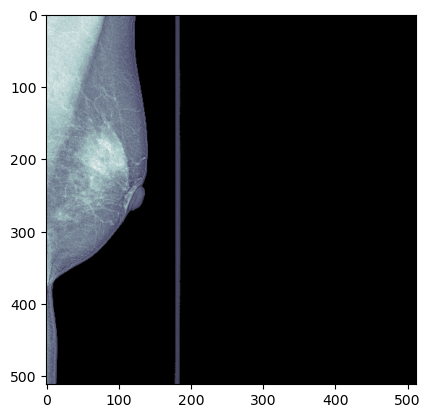

In [79]:
# Display the image and set the colour
plt.imshow(breast_img, cmap = plt.cm.bone)

In [82]:
# Print info regarding the image 
print(breast_img.shape)
print(breast_img.min())
print(breast_img.max())

(512, 512)
0.0
0.9647059


#### Using PIL

In [83]:
# Open the image in the specified path
image = Image.open(img)

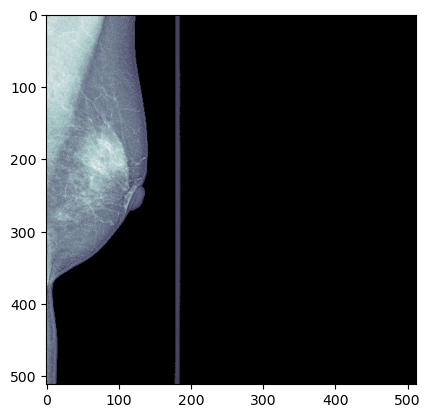

In [84]:
# Display the image and set the colour
plt.imshow(image, cmap = plt.cm.bone)

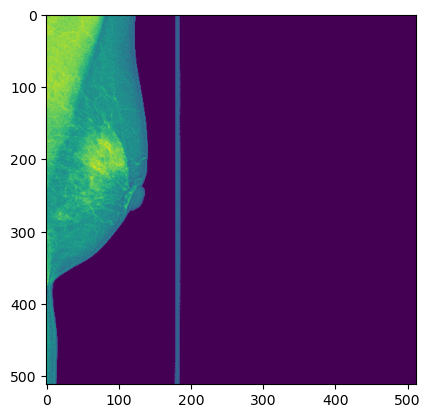

In [85]:
# Display the image
plt.imshow(image)

In [65]:
img_array = np.array(image) / 255.0

In [66]:
img_array

array([[0.73333333, 0.74901961, 0.76862745, ..., 0.        , 0.        ,
        0.        ],
       [0.74901961, 0.77647059, 0.73333333, ..., 0.        , 0.        ,
        0.        ],
       [0.76078431, 0.76078431, 0.80784314, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5372549 , 0.49803922, 0.44313725, ..., 0.        , 0.        ,
        0.        ],
       [0.52156863, 0.52941176, 0.46666667, ..., 0.        , 0.        ,
        0.        ],
       [0.48627451, 0.50980392, 0.4627451 , ..., 0.        , 0.        ,
        0.        ]])

In [86]:
# Verify format
print(image.format)

# Verify size
print(image.size)

# Verify greyscale
print(image.mode)

PNG
(512, 512)
L


## Compile Cancer and No Cancer PNG Lists

In [69]:
# Create list that will contain the relevant PNG image patient_image_id - cancer
cancer_png_id = new_cancer_meta["patient_image_id"].tolist()

In [70]:
# Create list that will contain the relevant PNG image patient_image_id - no cancer
no_cancer_png_id = new_no_cancer_meta["patient_image_id"].tolist()

In [71]:
# Compare sizes - cancer
print(len(cancer_png_id))
print(len(new_cancer_meta))

1158
1158


In [72]:
# Compare sizes - no cancer
print(len(no_cancer_png_id))
print(len(new_no_cancer_meta))

53548
53548


In [73]:
cancer_png_id[0:10]

['10130_1360338805',
 '10130_1672636630',
 '10130_388811999',
 '10130_613462606',
 '10226_461614796',
 '10226_530620473',
 '1025_1803952236',
 '1025_773597682',
 '10432_1434858530',
 '10432_458553546']

In [74]:
no_cancer_png_id[20:30]

['10042_495770405',
 '10048_1234933874',
 '10048_1577142909',
 '10048_1842203124',
 '10048_964141995',
 '10049_1207499426',
 '10049_1351270472',
 '10049_1464813991',
 '10049_349510516',
 '10049_906829939']

## 1000 PNG for Each Class

In [91]:
# Create a list of 1000 png patient_image_id  - cancer
cancer_png_id_lim = cancer_png_id[0:1000]

In [92]:
# Create a list of 1000 png patient_image_id - no cancer
no_cancer_png_id_lim = no_cancer_png_id[0:1000]

## Copy PNG Images to Class Folders

In [87]:
# Define the destination directories
data_dir_cancer = "RSNA_Mammograms_PNG_Clas/Cancer/"
data_dir_no_cancer = "RSNA_Mammograms_PNG_Clas/No_Cancer/"

In [106]:
# Iterate through the 54706 png images and the first 1000 cancer and first 1000 no cancer png images gets copied to a specified folder
for png in sorted_data_folder:
    # Remove the .png from the image path
    img = str(png[:-4])

    # If the img patient_image_id is in the cancer list
    if img in cancer_png_id_lim:
        # Define the source png image path
        source_img_path = data_dir + "/" + png
        # Define the destination png image path
        destination_img_path = data_dir_cancer + "/" + png

        # Copy the file to the determined destination
        shutil.copy(source_img_path, destination_img_path)

    
    # If the img patient_image_id is in the no cancer list
    if img in no_cancer_png_id_lim:
        # Define the source png image path
        source_img_path = data_dir + "/" + png
        # Define the destination png image path
        destination_img_path = data_dir_no_cancer + "/" + png

        # Copy the file to the determined destination
        shutil.copy(source_img_path, destination_img_path)

In [109]:
# Get a list of all the patient images - cancer
data_folder_cancer = os.listdir(data_dir_cancer)

In [110]:
# Get a list of all the patient images - no cancer
data_folder_no_cancer = os.listdir(data_dir_no_cancer)

In [112]:
# Ensure that all images are present 
print(len(data_folder_cancer))
print(len(data_folder_no_cancer))

1000
1000
